In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from numpy import genfromtxt
data1 = genfromtxt('data1.csv', delimiter=',')
X = data1[:,:-1]
y = data1[:, -1]

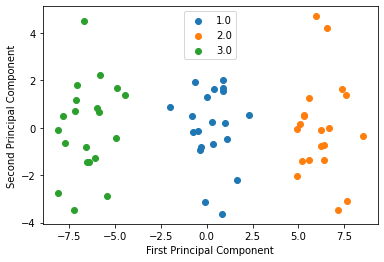

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pc1 = X_pca[:, 0]
pc2 = X_pca[:, 1]

for c in np.unique(y):
    plt.scatter(pc1[y == c], pc2[y == c], label=str(c))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

## K = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

y_pred = kmeans.labels_

ari = adjusted_rand_score(y, y_pred)
print("K-means with K=3, Adjusted Rand Index:", ari)

K-means with K=3, Adjusted Rand Index: 1.0


Clusters obtained in the k-means clustering with k=3 match the true labels completely as the ari score is 1.

In [43]:
## K = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

y_pred = kmeans.labels_

ari = adjusted_rand_score(y, y_pred)
print("K-means with K=2, Adjusted Rand Index:", ari)

K-means with K=2, Adjusted Rand Index: 0.5387959179866048


In [44]:
## K = 4
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

y_pred = kmeans.labels_

ari = adjusted_rand_score(y, y_pred)
print("K-means with K=4, Adjusted Rand Index:", ari)

K-means with K=4, Adjusted Rand Index: 0.5387959179866048


k-means clustering with k=3 and k-means clustering with k=4 have almost equal ari score of 0.538 which indicates it is not a perfect match with true labels but better than random clustering.

In [45]:
# K=3 with PCs
pcs = np.stack((pc1, pc2), axis=1)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pcs)

y_pred = kmeans.labels_

ari = adjusted_rand_score(y, y_pred)
print("K-means with K=3 on PC components, Adjusted Rand Index:", ari)

K-means with K=3 on PC components, Adjusted Rand Index: 1.0


k-means clustering with k=3 on principal component score vectors match completely with true score labels as it have ari score of 1.

(50, 2)


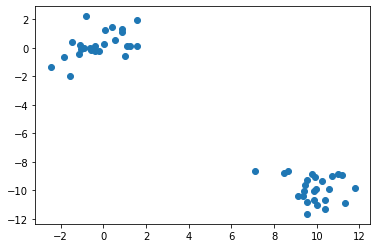

In [27]:
data2 = np.genfromtxt('data2.csv', delimiter=',')
plt.scatter(data2[:,0], data2[:,1])
print(data2.shape)

We can observe 2 clusters.

In [38]:
# Inter Observational Distance
import scipy
pairwise_distance = scipy.spatial.distance.pdist(data2, metric='euclidean')
print(pairwise_distance)

[2.08214614 1.10195725 2.5063929  ... 1.70270849 1.57807901 1.59521567]


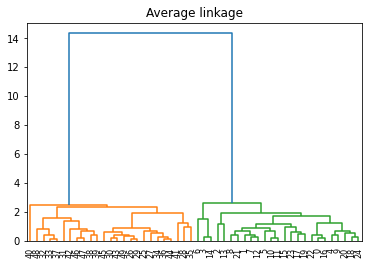

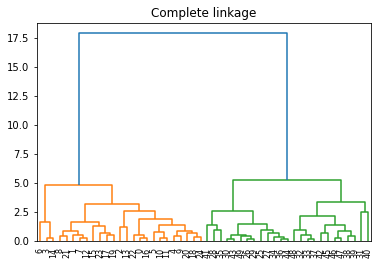

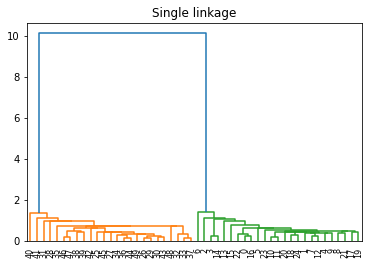

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering using average linkage
average_linkage = linkage(pairwise_distance, method='average')

# Perform hierarchical clustering using complete linkage
complete_linkage = linkage(pairwise_distance, method='complete')

# Perform hierarchical clustering using single linkage
single_linkage = linkage(pairwise_distance, method='single')


# Plot dendrogram for average linkage
plt.figure()
dendrogram(average_linkage)
plt.title("Average linkage")
plt.show()

# Plot dendrogram for complete linkage
plt.figure()
dendrogram(complete_linkage)
plt.title("Complete linkage")
plt.show()

# Plot dendrogram for single linkage
plt.figure()
dendrogram(single_linkage)
plt.title("Single linkage")
plt.show()

In [46]:
clusters = 2

# Extract cluster labels for each observation for average linkage
cluster_labels_average = fcluster(average_linkage, clusters, criterion='maxclust')

# Extract cluster labels for each observation for complete linkage
cluster_labels_complete = fcluster(complete_linkage, clusters, criterion='maxclust')

# Extract cluster labels for each observation for single linkage
cluster_labels_single = fcluster(single_linkage, clusters, criterion='maxclust')

print("Cluster labels for average linkage:", cluster_labels_average)
print("Cluster labels for complete linkage:", cluster_labels_complete)
print("Cluster labels for single linkage:", cluster_labels_single)

Cluster labels for average linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
Cluster labels for complete linkage: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
Cluster labels for single linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
